In [13]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
exp_dict = {'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:copy.deepcopy(exp_dict) for surrogate in surrogates}
directory="./results_real_data/results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True and params['acquisition']=="EI":
            results_dict[params['surrogate']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']]['sharpness'].append(metrics['mean_sharpness'])
            results_dict[params['surrogate']]['calibration_mse'].append(metrics['y_calibration_mse'])

In [14]:
column_names = {'surrogate':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    column_names['surrogate'].append(surrogate)
    column_names['inst_regret_test'].append(np.array(results_dict[surrogate]['inst_regret_test']).mean(axis=0)[-1])
    column_names['inst_regret_pool'].append(np.array(results_dict[surrogate]['inst_regret_pool']).mean(axis=0)[-1])
    column_names['tot_regret_test'].append(np.array(results_dict[surrogate]['tot_regret_test']).mean(axis=0)[-1])
    column_names['tot_regret_pool'].append(np.array(results_dict[surrogate]['tot_regret_pool']).mean(axis=0)[-1])
    column_names['calibration_mse'].append(np.array(results_dict[surrogate]['calibration_mse']).mean(axis=0)[-1])
    column_names['sharpness'].append(np.array(results_dict[surrogate]['sharpness']).mean(axis=0)[-1])
    column_names['x_opt_dist_test'].append(np.array(results_dict[surrogate]['x_opt_dist_test']).mean(axis=0)[-1])
    column_names['x_opt_dist_pool'].append(np.array(results_dict[surrogate]['x_opt_dist_pool']).mean(axis=0)[-1])

In [15]:
df = pd.DataFrame.from_dict(column_names)
display(df)

,surrogate,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
0,BNN,0.077776,0.076023,7.855349,7.678342,0.070897,0.082350,2.379112,2.287373
1,RF,0.002111,0.000119,1.440757,1.258007,0.010766,-0.677659,1.915892,0.363764
2,GP,0.005231,0.003479,1.924739,1.747732,0.008575,-0.379879,1.700792,0.892353
3,DE,0.002111,0.000119,1.371771,1.188781,0.031632,0.012249,1.915892,0.363764


In [4]:
import json
import os
import numpy as np
import pandas as pd
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
exp_dict = {'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:copy.deepcopy(exp_dict) for surrogate in surrogates}
directory="./results_real_data/results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True and params['acquisition'] != 'RS':
            results_dict[params['surrogate']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']]['calibration_mse'].append(metrics['y_calibration_mse'])

In [5]:
column_names = {'surrogate':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    column_names['surrogate'].append(surrogate)
    column_names['inst_regret_test'].append(np.array(results_dict[surrogate]['inst_regret_test']).mean(axis=0)[-1])
    column_names['inst_regret_pool'].append(np.array(results_dict[surrogate]['inst_regret_pool']).mean(axis=0)[-1])
    column_names['tot_regret_test'].append(np.array(results_dict[surrogate]['tot_regret_test']).mean(axis=0)[-1])
    column_names['tot_regret_pool'].append(np.array(results_dict[surrogate]['tot_regret_pool']).mean(axis=0)[-1])
    column_names['calibration_mse'].append(np.array(results_dict[surrogate]['calibration_mse']).mean(axis=0)[-1])
    column_names['sharpness'].append(np.array(results_dict[surrogate]['calibration_mse']).mean(axis=0)[-1])
    column_names['x_opt_dist_test'].append(np.array(results_dict[surrogate]['x_opt_dist_test']).mean(axis=0)[-1])
    column_names['x_opt_dist_pool'].append(np.array(results_dict[surrogate]['x_opt_dist_pool']).mean(axis=0)[-1])

In [6]:
df = pd.DataFrame.from_dict(column_names)
display(df)

,surrogate,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
0,BNN,0.043067,0.041314,5.705066,5.528060,0.074766,0.074766,1.692949,1.942210
1,RF,0.009024,0.007192,1.956949,1.778028,0.007368,0.007368,2.135600,1.461835
2,GP,0.004946,0.003193,1.890339,1.713332,0.010138,0.010138,1.617271,1.099050
3,DE,0.004678,0.002766,1.603955,1.424236,0.027473,0.027473,1.848996,0.906883


In [166]:
import json
import os
import numpy as np
import pandas as pd
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
acquisitions = ['EI', 'RS', 'UCB']
exp_dict = {'acquisition':[],'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:{acquisition:copy.deepcopy(exp_dict) for acquisition in acquisitions} for surrogate in surrogates}
directory="./results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True:
            results_dict[params['surrogate']][params['acquisition']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']][params['acquisition']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']][params['acquisition']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']][params['acquisition']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']][params['acquisition']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']][params['acquisition']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']][params['acquisition']]['calibration_mse'].append(metrics['y_calibration_mse'])

In [171]:
column_names = {'surrogate':[], 'acquisition':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    for acq in acquisitions:
        result_dict = results_dict[surrogate][acq]
        column_names['surrogate'].append(surrogate)
        column_names['acquisition'].append(acq)
        column_names['inst_regret_test'].append(np.array(result_dict['inst_regret_test']).mean(axis=0)[-1])
        column_names['inst_regret_pool'].append(np.array(result_dict['inst_regret_pool']).mean(axis=0)[-1])
        column_names['tot_regret_test'].append(np.array(result_dict['tot_regret_test']).mean(axis=0)[-1])
        column_names['tot_regret_pool'].append(np.array(result_dict['tot_regret_pool']).mean(axis=0)[-1])
        column_names['calibration_mse'].append(np.array(result_dict['calibration_mse']).mean(axis=0)[-1])
        column_names['x_opt_dist_test'].append(np.array(result_dict['x_opt_dist_test']).mean(axis=0)[-1])
        column_names['x_opt_dist_pool'].append(np.array(result_dict['x_opt_dist_pool']).mean(axis=0)[-1])
#EXPLORATION PARAM IN UCB?

/var/folders/pg/8kgknkg97zgbj393j1nl2gdh0000gn/T/ipykernel_29043/3934684622.py:12: RuntimeWarning: Mean of empty slice.
  column_names['sharpness'].append(np.array(result_dict['sharpness']).mean(axis=0)[-1])
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: invalid index to scalar variable.

In [170]:
df = pd.DataFrame.from_dict(column_names)
df = df.sort_values('calibration_mse')
display(df)

,surrogate,acquisition,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
7,GP,RS,0.018467,0.017053,3.343981,3.201156,0.001074,0.001074,1.531298,2.044028
10,DE,RS,0.019890,0.018199,3.528680,3.383915,0.002099,0.002099,1.949876,2.188604
4,RF,RS,0.022690,0.021216,3.950461,3.807517,0.002589,0.002589,1.868767,1.891383
8,GP,UCB,0.004501,0.002521,2.024838,1.862155,0.016751,0.016751,1.851887,1.060813
6,GP,EI,0.003666,0.001756,2.038871,1.885037,0.017040,0.017040,1.800995,0.971749
5,RF,UCB,0.005402,0.003689,1.343570,1.176857,0.021021,0.021021,1.681376,1.204924
3,RF,EI,0.005855,0.003935,1.353766,1.167717,0.021673,0.021673,1.690952,1.201067
9,DE,EI,0.002760,0.000888,1.128171,0.951735,0.033327,0.033327,1.705922,0.593549
11,DE,UCB,0.002600,0.000729,1.113575,0.936234,0.034800,0.034800,1.717420,0.448578
2,BNN,UCB,0.032624,0.031050,4.966790,4.815213,0.078891,0.078891,2.119728,2.015077


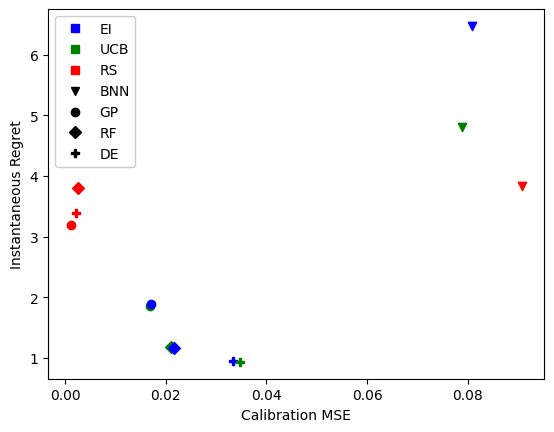

In [172]:
marker_dict = {'BNN':'v', 'GP': "o", 'RF':'D', 'DE':'P'}
color_dict = {'EI':'b', 'UCB':'g', 'RS':'r'}
for index, row in df.iterrows():
    plt.scatter(row['calibration_mse'], row['tot_regret_pool'], marker=marker_dict[row['surrogate']], color=color_dict[row['acquisition']])

    
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", list(color_dict.values())[i]) for i in range(3)]
handles += [f(list(marker_dict.values())[i], "k") for i in range(4)]
labels = list(color_dict.keys()) + ['BNN', 'GP', 'RF', 'DE']

plt.legend(handles, labels, loc=2, framealpha=1)
plt.xlabel('Calibration MSE')
plt.ylabel('Instantaneous Regret')
plt.show()

In [175]:
#TODO: Calculate new sample distance to nearest in training data at every BO iteration.
#TODO: Make ranking. Rank four surrogate models for one specific seed, dataset and acquistion function.
print(len([[0.85216802945564], [0.9796499778609811], [1.7319457048592344], [1.3013670289165014], [2.6143284981069916], [1.6910675460981386], [1.1054294645425786], [1.6713345438251763], [1.2594462877514772], [1.4664952414005414], [1.8491430217748834], [1.5589459519758067], [1.4343461830747533], [1.1559642191441728], [1.3058856081035617], [0.9798185160879221], [1.3487392094452473], [1.147530457993135], [1.2109971509841404], [0.978419828645433], [1.046736991541116], [2.058772199512438], [1.0873440361036426], [0.697252708791025], [0.6957823352371522], [1.3394479037424936], [1.5496707980455158], [0.8549722777358603], [0.7800027853371898], [1.6744180536412845], [1.5767549710153015], [1.4589989930056246], [0.7789467415439548], [2.0371108974604972], [1.809532467026455], [1.2927557217621441], [1.1018294786930265], [0.7703045482111519], [1.956857982051085], [1.0873357914910455], [1.664820382767177], [1.3881243019042724], [2.005975090874568], [0.9138272732097178], [1.388651682050511], [0.9234915091057267], [1.4265814383296849], [0.8521680294556402], [0.6943258410252555], [2.1242217255186002], [0.695782335237152], [0.7687511355120255], [0.48990925804396096], [0.6972655658421145], [1.1035450546825836], [1.2105287805388734], [1.0403562456505935], [1.8633645109961772], [1.2927557217621435], [0.7786886818526499], [1.5102814427510962], [1.2446067927270115], [1.0403303944834499], [0.8481439912189138], [1.048898015517321], [1.1502072272725568], [0.4874631190904859], [0.6940621509521361], [0.7687511355120255], [1.5003069908551316], [0.7771520279852959], [1.2927765252845786], [0.9798551127792042], [0.6032713022279209], [0.7771404925809462], [0.7703161859830611], [0.8561974058476766], [1.0973360020429561], [0.48746311909048595], [1.209162945661001], [0.6015712611182606], [0.7727374418365522], [0.6972655658421144], [0.6989778665686657], [1.7714170220601826], [0.8445136968549881], [0.853805072593619], [0.9196000225419176], [1.1035450546825836], [1.4583049671035175], [0.985238189603771], [0.9171832591837789], [0.8457221754695909], [1.588617215738164], [0.4899092580439613], [1.2518301173006279], [0.8524038440450842], [1.3356194358418028], [0.6052643902694366], [0.9838227516562361], [0.6940621509521361]]))

101


In [186]:
import json
import os
import numpy as np
import pandas as pd
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
betas = [0.2, 0.5, 1, 2]
exp_dict = {'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:{beta:copy.deepcopy(exp_dict) for beta in betas} for surrogate in surrogates}
directory="./results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True and params['acquisition'] == "UCB":
            #results_dict[params['surrogate']][params['beta'].append(params['beta'])
            results_dict[params['surrogate']][params['beta']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']][params['beta']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']][params['beta']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']][params['beta']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']][params['beta']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']][params['beta']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']][params['beta']]['calibration_mse'].append(metrics['y_calibration_mse'])
column_names = {'surrogate':[], 'beta':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    for beta in betas:
        result_dict = results_dict[surrogate][beta]
        column_names['surrogate'].append(surrogate)
        column_names['beta'].append(beta)
        column_names['inst_regret_test'].append(np.array(result_dict['inst_regret_test']).mean(axis=0)[-1])
        column_names['inst_regret_pool'].append(np.array(result_dict['inst_regret_pool']).mean(axis=0)[-1])
        column_names['tot_regret_test'].append(np.array(result_dict['tot_regret_test']).mean(axis=0)[-1])
        column_names['tot_regret_pool'].append(np.array(result_dict['tot_regret_pool']).mean(axis=0)[-1])
        column_names['calibration_mse'].append(np.array(result_dict['calibration_mse']).mean(axis=0)[-1])
        column_names['x_opt_dist_test'].append(np.array(result_dict['x_opt_dist_test']).mean(axis=0)[-1])
        column_names['x_opt_dist_pool'].append(np.array(result_dict['x_opt_dist_pool']).mean(axis=0)[-1])    
df = pd.DataFrame.from_dict(column_names)
df = df.sort_values('surrogate')
display(df)

,surrogate,beta,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,x_opt_dist_test,x_opt_dist_pool
0,BNN,0.2,0.007725,0.005972,2.125334,1.948328,0.082000,2.610578,1.465124
1,BNN,0.5,0.018279,0.016526,3.765185,3.588179,0.084382,2.482619,1.386001
2,BNN,1.0,0.020169,0.018417,4.204603,4.027596,0.087504,2.398777,1.964965
3,BNN,2.0,0.041613,0.039861,4.933865,4.756858,0.087742,2.149339,2.489028
12,DE,0.2,0.004871,0.002879,1.232042,1.046420,0.025807,1.574652,0.583225
13,DE,0.5,0.002905,0.000913,1.101782,0.905631,0.019836,1.689658,0.154833
14,DE,1.0,0.001992,0.000000,1.017875,0.835843,0.022918,1.662880,0.000000
15,DE,2.0,0.002351,0.000598,1.186640,1.009634,0.019778,1.944907,0.616496
8,GP,0.2,0.005113,0.003360,1.925475,1.748468,0.023740,1.963147,1.582238
9,GP,0.5,0.003876,0.001884,1.660606,1.470916,0.022845,1.773306,1.007527


In [6]:
#Instantaneous regret of pool rankings from real_data with recalibrated uncertanties.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_real_data/"
subdirectories = ['results_FashionMNIST_recalibrator/', "results_FashionMNIST_CNN_recalibrator/", 'results_mnist_recalibrator/', 'results_MNIST_CNN_recalibrator/', 'results_News_recalibrator/', 'results_SVM_recalibrator/']
for subdirectory in subdirectories:
    full_path = os.path.join(main_directory, subdirectory)
    for foldername in os.listdir(full_path):
        folder = os.path.join(full_path, foldername)
        if os.path.isdir(folder):
            for filename in os.listdir(folder):
                if filename.find("parameters") != -1:
                    json_file = open(os.path.join(folder, filename))
                    params = json.load(json_file)
                elif filename.find("metrics") != -1:
                    json_file = open(os.path.join(folder, filename))
                    metrics = json.load(json_file)
            if params['bo'] == True:
                exp_dict['surrogate'].append(params['surrogate'])
                exp_dict['acquisition'].append(params['acquisition'])
                exp_dict['data'].append(params['data_name'])
                exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
                exp_dict['inst_regret_test'].append(metrics['y_regret_test'])
                exp_dict['inst_regret_pool'].append(metrics['y_regret_pool'])
                exp_dict['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
                exp_dict['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
                exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
                exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
                exp_dict['sharpness'].append(metrics['mean_sharpness'])
                exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
                exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['data'].append(row['data'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean()) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(processed_results)
seeds = np.arange(5)+1
datasets = ['fashionmnist', 'fashionmnist_cnn', 'mnist', 'mnist_cnn', 'news', 'svm_wine']
for seed in seeds:
    for dataset in datasets:
        #For one problem and one seed, we get a ranking going from 1-16 (depending on ties) since there are 4 surrogates and 4 acqs.
        selection = df.loc[(df['data']==dataset) & (df['seed']==seed)]
        df.loc[((df['data']==dataset) & (df['seed']==seed)),'min_rank'] = selection['inst_regret_pool'].rank(method="min")
acqs = ['UCB', 'TS', 'EI', 'RS']
surrogates = ['BNN', 'DE', 'GP', 'RF']
ranking_dict  = {'Acq':[], 'Surrogate':[], 'Rank':[]}
for acq in acqs:
    for surrogate in surrogates:
        ranking_dict['Rank'].append(df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate)),'min_rank'].mean())
        ranking_dict['Acq'].append(acq)
        ranking_dict['Surrogate'].append(surrogate)
display(pd.DataFrame.from_dict(ranking_dict).sort_values('Rank'))

,Acq,Surrogate,Rank
1,UCB,DE,2.733333
9,EI,DE,2.866667
3,UCB,RF,2.966667
11,EI,RF,3.000000
2,UCB,GP,4.633333
6,TS,GP,4.900000
10,EI,GP,5.133333
5,TS,DE,6.633333
13,RS,DE,8.033333
15,RS,RF,8.933333


In [31]:
#Instantaneous regret of pool rankings from real_data with vanilla uncertanties.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_real_data/"
subdirectories = ['results_FashionMNIST/', "results_FashionMNIST_CNN/", 'results_mnist/', 'results_MNIST_CNN/', 'results_News/', 'results_SVM/']
for subdirectory in subdirectories:
    full_path = os.path.join(main_directory, subdirectory)
    for foldername in os.listdir(full_path):
        folder = os.path.join(full_path, foldername)
        if os.path.isdir(folder):
            for filename in os.listdir(folder):
                if filename.find("parameters") != -1:
                    json_file = open(os.path.join(folder, filename))
                    params = json.load(json_file)
                elif filename.find("metrics") != -1:
                    json_file = open(os.path.join(folder, filename))
                    metrics = json.load(json_file)
            if params['bo'] == True:
                exp_dict['surrogate'].append(params['surrogate'])
                exp_dict['acquisition'].append(params['acquisition'])
                exp_dict['data'].append(params['data_name'])
                exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
                exp_dict['inst_regret_test'].append(metrics['y_regret_test'])
                exp_dict['inst_regret_pool'].append(metrics['y_regret_pool'])
                exp_dict['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
                exp_dict['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
                exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
                exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
                exp_dict['sharpness'].append(metrics['mean_sharpness'])
                exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
                exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['data'].append(row['data'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean()) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(processed_results)
seeds = np.arange(20)+1
datasets = ['fashionmnist', 'fashionmnist_cnn', 'mnist', 'mnist_cnn', 'news', 'svm_wine']
for seed in seeds:
    for dataset in datasets:
        #For one problem and one seed, we get a ranking going from 1-16 (depending on ties) since there are 4 surrogates and 4 acqs.
        selection = df.loc[(df['data']==dataset) & (df['seed']==seed)]
        df.loc[((df['data']==dataset) & (df['seed']==seed)),'min_rank'] = selection['inst_regret_pool'].rank(method="min")
acqs = ['UCB', 'TS', 'EI', 'RS']
surrogates = ['BNN', 'DE', 'GP', 'RF']
ranking_dict  = {'Acq':[], 'Surrogate':[], 'Rank':[]}
for acq in acqs:
    for surrogate in surrogates:
        ranking_dict['Rank'].append(df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate)),'min_rank'].mean())
        ranking_dict['Acq'].append(acq)
        ranking_dict['Surrogate'].append(surrogate)
display(pd.DataFrame.from_dict(ranking_dict).sort_values('Rank'))

,Acq,Surrogate,Rank
1,UCB,DE,2.280702
9,EI,DE,2.333333
7,TS,RF,2.798246
5,TS,DE,2.815789
2,UCB,GP,3.824561
10,EI,GP,4.587719
3,UCB,RF,5.140351
11,EI,RF,5.421053
6,TS,GP,5.754386
0,UCB,BNN,8.043860


In [32]:
#Instantaneous regret of pool rankings from real_data with recalibrated uncertanties.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_real_data/"
subdirectories = ['results_FashionMNIST/', "results_FashionMNIST_CNN/", 'results_mnist/', 'results_MNIST_CNN/', 'results_News/', 'results_SVM/']
for subdirectory in subdirectories:
    full_path = os.path.join(main_directory, subdirectory)
    for foldername in os.listdir(full_path):
        folder = os.path.join(full_path, foldername)
        if os.path.isdir(folder):
            for filename in os.listdir(folder):
                if filename.find("parameters") != -1:
                    json_file = open(os.path.join(folder, filename))
                    params = json.load(json_file)
                elif filename.find("metrics") != -1:
                    json_file = open(os.path.join(folder, filename))
                    metrics = json.load(json_file)
            if params['bo'] == True:
                exp_dict['surrogate'].append(params['surrogate'])
                exp_dict['acquisition'].append(params['acquisition'])
                exp_dict['data'].append(params['data_name'])
                exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
                exp_dict['inst_regret_test'].append(metrics['y_regret_test'])
                exp_dict['inst_regret_pool'].append(metrics['y_regret_pool'])
                exp_dict['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
                exp_dict['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
                exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
                exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
                exp_dict['sharpness'].append(metrics['mean_sharpness'])
                exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
                exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['data'].append(row['data'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean()) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
df = pd.DataFrame.from_dict(processed_results)
acqs = ['UCB', 'TS', 'EI', 'RS']
surrogates = ['BNN', 'DE', 'GP', 'RF']
aggregated_processed_results = {'surrogate': [], 'acquisition': [], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for acq in acqs:
    for surrogate in surrogates:
        selection = df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate))]
        aggregated_processed_results['surrogate'].append(surrogate)
        aggregated_processed_results['acquisition'].append(acq)
        aggregated_processed_results['dist_nearest_train_mean'].append(np.mean(selection['dist_nearest_train_mean']))
        aggregated_processed_results['inst_regret_test'].append(np.mean(selection['inst_regret_test']))
        aggregated_processed_results['inst_regret_pool'].append(np.mean(selection['inst_regret_pool']))
        aggregated_processed_results['tot_regret_test'].append(np.mean(selection['tot_regret_test']))
        aggregated_processed_results['tot_regret_pool'].append(np.mean(selection['tot_regret_pool']))
        aggregated_processed_results['calibration_mse'].append(np.mean(selection['calibration_mse']))
        aggregated_processed_results['sharpness'].append(np.mean(selection['sharpness']))
        aggregated_processed_results['x_opt_dist_test'].append(np.mean(selection['x_opt_dist_test']))
        aggregated_processed_results['x_opt_dist_pool'].append(np.mean(selection['x_opt_dist_pool']))
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(aggregated_processed_results)
df = df.sort_values('inst_regret_pool')
display(df)

,surrogate,acquisition,dist_nearest_train_mean,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
1,DE,UCB,0.752876,0.003519,0.001122,0.982102,0.814340,0.038703,-0.239671,1.723850,0.921263
9,DE,EI,0.740195,0.003557,0.001150,0.999771,0.824224,0.037743,-0.253204,1.817373,1.122592
7,RF,TS,0.898048,0.003501,0.001757,1.494169,1.393535,0.010882,1.050355,1.756615,1.042457
5,DE,TS,0.822051,0.004002,0.001855,1.097050,0.942352,0.039707,-0.207731,1.800015,1.215482
2,GP,UCB,0.865208,0.004642,0.002687,1.643520,1.528388,0.014684,-0.524657,1.720724,1.262247
10,GP,EI,0.928877,0.004984,0.003584,1.666980,1.566440,0.014715,-0.536295,1.741750,1.470633
3,RF,UCB,0.864298,0.005117,0.004052,1.137401,1.047545,0.017205,1.045835,1.730727,1.549806
6,GP,TS,0.944901,0.005750,0.004462,1.768342,1.680947,0.011654,-0.570464,1.685313,1.619732
11,RF,EI,0.863244,0.006023,0.004758,1.187794,1.081407,0.015345,0.937655,1.713763,1.613669
0,BNN,UCB,1.002565,0.012636,0.011164,2.768467,2.658428,0.100354,1.046635,1.937491,1.972456


In [35]:
#Instantaneous regret of pool rankings from real_data with vanilla uncertanties.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_real_data/"
subdirectories = ['results_FashionMNIST/', "results_FashionMNIST_CNN/", 'results_mnist/', 'results_MNIST_CNN/', 'results_News/', 'results_SVM/']
for subdirectory in subdirectories:
    full_path = os.path.join(main_directory, subdirectory)
    for foldername in os.listdir(full_path):
        folder = os.path.join(full_path, foldername)
        if os.path.isdir(folder):
            for filename in os.listdir(folder):
                if filename.find("parameters") != -1:
                    json_file = open(os.path.join(folder, filename))
                    params = json.load(json_file)
                elif filename.find("metrics") != -1:
                    json_file = open(os.path.join(folder, filename))
                    metrics = json.load(json_file)
            if params['bo'] == True:
                exp_dict['surrogate'].append(params['surrogate'])
                exp_dict['acquisition'].append(params['acquisition'])
                exp_dict['data'].append(params['data_name'])
                exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
                exp_dict['inst_regret_test'].append(metrics['y_regret_test'])
                exp_dict['inst_regret_pool'].append(metrics['y_regret_pool'])
                exp_dict['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
                exp_dict['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
                exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
                exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
                exp_dict['sharpness'].append(metrics['mean_sharpness'])
                exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
                exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['data'].append(row['data'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean()) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(processed_results)
seeds = np.arange(20)+1
datasets = ['fashionmnist', 'fashionmnist_cnn', 'mnist', 'mnist_cnn', 'news', 'svm_wine']
acqs = ['UCB', 'TS', 'EI', 'RS']
for seed in seeds:
    for dataset in datasets:
        for acq in acqs:
            #For one problem and one seed, we get a ranking going from 1-16 (depending on ties) since there are 4 surrogates and 4 acqs.
            selection = df.loc[(df['data']==dataset) & (df['seed']==seed) & (df['acquisition']==acq)]
            df.loc[((df['data']==dataset) & (df['seed']==seed) & (df['acquisition']==acq)),'min_rank'] = selection['inst_regret_pool'].rank(method="min")
surrogates = ['BNN', 'DE', 'GP', 'RF']
ranking_dict  = {'Surrogate':[], 'Rank':[]}
for surrogate in surrogates:
    ranking_dict['Rank'].append(df.loc[((df['surrogate']==surrogate)),'min_rank'].mean())
    ranking_dict['Surrogate'].append(surrogate)
display(pd.DataFrame.from_dict(ranking_dict).sort_values('Rank'))

,Surrogate,Rank
1,DE,1.524123
3,RF,1.956140
2,GP,1.989035
0,BNN,2.846491
